In [23]:
# Import the 'pipeline' function from the 'transformers' library.
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import numpy as np
# Create a pipeline for image classification tasks. 
# You need to specify the 'model_name' and the 'device' to use for inference.
# - 'model_name': The name of the pre-trained model to be used for image classification.
# - 'device': Specifies the device to use for running the model (0 for GPU, -1 for CPU).
pipe = pipeline('image-classification', model="dima806/facial_emotions_image_detection", device=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


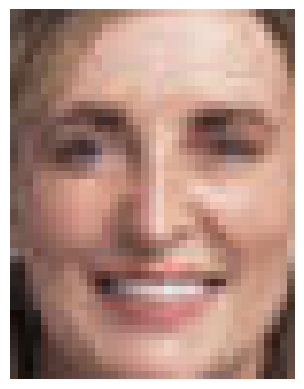

In [32]:
# Load the image
image = Image.open(r"D:\IntegrationXpert\male & female classification (2)\dataset\non-video\images\image_31.jpg")

# Convert image to RGB (if needed) and then to a NumPy array
image_rgb = image.convert('RGB')
image_np = np.asarray(image_rgb)

# Create an MTCNN detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(image_np)

# Extract and display each face
for i, face in enumerate(faces):
    # Get the bounding box coordinates
    x, y, width, height = face['box']
    
    # Extract the face
    face_image = image_rgb.crop((x, y, x + width, y + height))
    
    # Display the extracted face
    plt.subplot(1, len(faces), i + 1)
    plt.imshow(face_image)
    plt.axis('off')  # Hide the axis

plt.show()

In [33]:
# Apply the 'pipe' function to process the 'image' variable.
emotion_list = pipe(face_image)
emotion_list

[{'label': 'happy', 'score': 0.9814855456352234},
 {'label': 'neutral', 'score': 0.006389715243130922},
 {'label': 'surprise', 'score': 0.004737855400890112},
 {'label': 'fear', 'score': 0.0021471884101629257},
 {'label': 'sad', 'score': 0.0021357478108257055}]

In [34]:
# Find the label with the highest score
max_score_label = max(emotion_list, key=lambda x: x['score'])

# Extract the label name
highest_label = max_score_label['label']

print(highest_label)

happy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


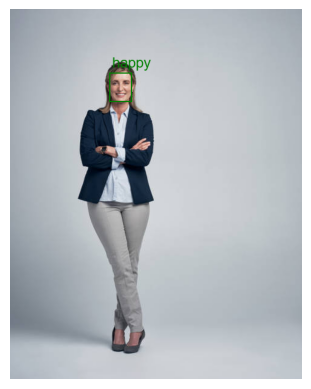

In [43]:
from transformers import pipeline
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import numpy as np

# Create a pipeline for image classification tasks
pipe = pipeline('image-classification', model="dima806/facial_emotions_image_detection", device=-1)

# Load the image
image = Image.open(r"D:\IntegrationXpert\male & female classification (2)\dataset\non-video\images\image_31.jpg")

# Convert image to RGB (if needed) and then to a NumPy array
image_rgb = image.convert('RGB')
image_np = np.asarray(image_rgb)

# Create an MTCNN detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(image_np)

# Prepare to draw on the image
draw = ImageDraw.Draw(image_rgb)

# Increase the font size
try:
    font = ImageFont.truetype("arial.ttf", size=24)  # Increased font size to 24
except IOError:
    font = ImageFont.load_default()

# Extract each face, classify the emotion, and draw the bounding box with the label
for face in faces:
    # Get the bounding box coordinates
    x, y, width, height = face['box']
    
    # Extract the face
    face_image = image_rgb.crop((x, y, x + width, y + height))
    
    # Apply the 'pipe' function to classify the emotion in the face
    emotion_list = pipe(face_image)
    
    # Find the label with the highest score
    max_score_label = max(emotion_list, key=lambda x: x['score'])
    
    # Extract the label name
    highest_label = max_score_label['label']
    
    # Draw the bounding box
    draw.rectangle([(x, y), (x + width, y + height)], outline="green", width=2)
    
    # Draw the label above the bounding box
    text_position = (x + 5, y - 30)  # Position the text 30 pixels above the bounding box
    draw.text(text_position, highest_label, fill="green", font=font)

# Display the image with bounding boxes and emotion labels
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()


In [1]:
from transformers import pipeline
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import numpy as np
import cv2

# Create a pipeline for image classification tasks
pipe = pipeline('image-classification', model="dima806/facial_emotions_image_detection", device=-1)

# Ask for input video path and output video path
input_video_path = r"C:\Users\User\Downloads\videos\video3.mp4"
output_video_name = "HF.mp4"  # Default output video name

# Ensure the output video name ends with '.mp4'
if not output_video_name.endswith('.mp4'):
    output_video_name += '.mp4'

output_video_path = r"D:\IntegrationXpert\final code\testing" + "\\" + output_video_name

# Create an MTCNN detector
detector = MTCNN()

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get the width and height of the video frames
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create a VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change 'mp4v' to other codecs as needed
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Increase the font size
try:
    font = ImageFont.truetype("arial.ttf", size=24)  # Increased font size to 24
except IOError:
    font = ImageFont.load_default()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to RGB (cv2 uses BGR by default)
    image_rgb = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    image_np = np.asarray(image_rgb)
    
    # Detect faces in the frame
    faces = detector.detect_faces(image_np)
    
    # Prepare to draw on the image
    draw = ImageDraw.Draw(image_rgb)
    
    # Extract each face, classify the emotion, and draw the bounding box with the label
    for face in faces:
        # Get the bounding box coordinates
        x, y, width, height = face['box']
        
        # Extract the face
        face_image = image_rgb.crop((x, y, x + width, y + height))
        
        # Apply the 'pipe' function to classify the emotion in the face
        emotion_list = pipe(face_image)
        
        # Find the label with the highest score
        max_score_label = max(emotion_list, key=lambda x: x['score'])
        
        # Extract the label name
        highest_label = max_score_label['label']
        
        # Draw the bounding box
        draw.rectangle([(x, y), (x + width, y + height)], outline="green", width=2)
        
        # Draw the label above the bounding box
        text_position = (x + 5, y - 30)  # Position the text 30 pixels above the bounding box
        draw.text(text_position, highest_label, fill="green", font=font)
    
    # Convert the image back to a format suitable for OpenCV
    frame_output = cv2.cvtColor(np.array(image_rgb), cv2.COLOR_RGB2BGR)
    
    # Write the processed frame to the output video
    out.write(frame_output)

# Release the video objects
cap.release()
out.release()

print("Processing complete. The video has been saved to", output_video_path)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
20/20 ━━

KeyboardInterrupt: 

In [18]:
from deepface import DeepFace
import cv2
from mtcnn import MTCNN
import os
import numpy as np
from collections import deque

# Path to the input video
video_path = r"C:\Users\User\Downloads\videos\video34.mp4"

# Path to save the processed video
save_dir = r"D:\IntegrationXpert\final code\testing"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'A.mp4')

# Load the video
cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object
out = cv2.VideoWriter(save_path, fourcc, fps, (frame_width, frame_height))

# Load the MTCNN face detector
detector = MTCNN()

# Frame skipping parameter
frame_skip = 3

# Create a deque to store face bounding boxes and IDs for tracking
face_tracks = deque(maxlen=100)

# Function to perform face tracking
def update_face_tracks(new_faces):
    global face_tracks
    updated_tracks = []
    for face in new_faces:
        x, y, w, h = face['box']
        updated_tracks.append((x, y, w, h))
    face_tracks = updated_tracks

while cap.isOpened():
    frame_id = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    
    # Skip frames based on the frame_skip parameter
    if frame_id % frame_skip != 0:
        cap.grab()
        continue
    
    ret, frame = cap.read()
    if not ret:
        break
    
    # Analyze the frame for emotion
    predictions = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
    dominant_emotion = predictions[0]['dominant_emotion']
    
    # Detect faces in the frame
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    faces = detector.detect_faces(rgb_frame)
    
    # Update face tracks
    update_face_tracks(faces)

    # Draw rectangles around faces and add the emotion text
    for face in face_tracks:
        x, y, w, h = face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved to {save_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━

In [19]:
from deepface import DeepFace
import cv2
from mtcnn import MTCNN
import os
import numpy as np
from collections import deque

# Path to the input video
video_path = r"C:\Users\User\Downloads\videos\video34.mp4"

# Path to save the processed video
save_dir = r"D:\IntegrationXpert\final code\testing"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'AB.mp4')

# Load the video
cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object
out = cv2.VideoWriter(save_path, fourcc, fps, (frame_width, frame_height))

# Load the MTCNN face detector
detector = MTCNN()

# Frame skipping parameter
frame_skip = 3
batch_size = 5  # Adjust batch size as needed

# Create a deque to store frames and their corresponding indices
frame_buffer = []
frame_indices = []

# Create a deque to store face bounding boxes and IDs for tracking
face_tracks = deque(maxlen=100)

# Function to perform face tracking
def update_face_tracks(new_faces):
    global face_tracks
    updated_tracks = []
    for face in new_faces:
        x, y, w, h = face['box']
        updated_tracks.append((x, y, w, h))
    face_tracks = updated_tracks

# Function to process a batch of frames
def process_batch(frames):
    results = []
    for frame in frames:
        # Analyze the frame for emotion
        predictions = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        results.append(predictions[0]['dominant_emotion'])
    return results

while cap.isOpened():
    frame_id = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    
    # Skip frames based on the frame_skip parameter
    if frame_id % frame_skip != 0:
        cap.grab()
        continue
    
    ret, frame = cap.read()
    if not ret:
        break
    
    # Add the frame to the buffer
    frame_buffer.append(frame)
    frame_indices.append(frame_id)

    # Process the frames in batches
    if len(frame_buffer) >= batch_size:
        batch_frames = frame_buffer
        batch_indices = frame_indices
        frame_buffer = []
        frame_indices = []

        # Process the batch
        emotions = process_batch(batch_frames)

        # Detect faces in each frame and update tracking
        for i, frame in enumerate(batch_frames):
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            faces = detector.detect_faces(rgb_frame)
            update_face_tracks(faces)

            # Draw rectangles around faces and add the emotion text
            for face in face_tracks:
                x, y, w, h = face
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, emotions[i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Write the frame to the output video
            out.write(frame)

# Process any remaining frames in the buffer
if frame_buffer:
    emotions = process_batch(frame_buffer)
    for i, frame in enumerate(frame_buffer):
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(rgb_frame)
        update_face_tracks(faces)

        for face in face_tracks:
            x, y, w, h = face
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, emotions[i], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved to {save_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
5/5 ━━━━━━━